In [1]:
#TEST

In [2]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20


In [3]:
name = 'model_FC'
model_name = "model_FC"
do_distr_yerror = "none"
do_yerror = 0
name_error = f'{do_distr_yerror}{do_yerror}std_Yerror'
#N = 16000 #MODEL_LC 
#N = 4000 #model NC
N = 3000
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'num_K': 5, 'num_A': 10 ,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N

In [4]:
#model.par.sigma_K = 1.0 # men jeg har løst det med det forkerte.... 
#model.par.sigma_love =  0.1 

data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
data = Estimate.aux_est(data,model.par)

data2 = data

#data2 = data2[data2['delta_log_barganing']< 0.5]
#data2 = data2[data2['delta_log_barganing']> -0.5]
#data2 = data2[data2['delta_log_barganing']!= 0]
print(data[['idx', 't','barganing','hours_w','hours_m','wealth']])

_, wald_FC_w , wald_NC_w,  _,_,_ = Estimate.main_est(data2,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=2, do_control_love = False, part_earning_simple =3, control_cons = 3, wealth_love = 2, BMI_dummy=False)
   

c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log] = data[log_name]-data[log_name_l]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:237: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

        idx   t  barganing   hours_w   hours_m    wealth
0         2   6   0.434556  0.965017  0.907667  2.204058
1         2   7   0.447137  0.944466  0.953474  2.913817
2         2   8   0.447137  0.898189  0.888260  3.373329
3         2   9   0.447137  0.902927  0.845616  3.810124
4         2  10   0.447137  0.838376  0.883958  4.454913
...     ...  ..        ...       ...       ...       ...
16508  2997  14   0.560650  0.802198  0.996862  1.835954
16509  2997  15   0.560650  0.763688  0.990504  1.911603
16510  2998   6   0.492156  0.919383  0.985809  2.759643
16511  2999   6   0.641386  0.769080  0.979962  0.070132
16512  2999   7   0.610369  0.752796  1.000000  0.210596

[16513 rows x 6 columns]


c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wealth_and_Love[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise')
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:526: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wealth_and_Love[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise')
c:\Users\czk481\Anaconda3\lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test w

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     323.7
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        10:47:41   Log-Likelihood:                 27906.
No. Observations:               10409   AIC:                        -5.479e+04
Df Residuals:                    9898   BIC:                        -5.109e+04
Df Model:                         510                                         
Covariance Type:              cluster                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [5]:
#SUMMARIZE!! TORSDAG!!  N = 5000, FC: 5066 NC: 19,000 , LC: 21,000
data2 = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data2 = Estimate.create_variable(data2, model.par)
data2['BMI_w']=data2['BMI_w']-1
data2['BMI_m']=data2['BMI_m']-1
summary = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing']].describe()
summary_by_T = data2[['hours_w','hours_m','cons','wage_w','wage_m','earnings_w','earnings_m','wealth','BMI_w','BMI_m','barganing','t']].groupby('t').mean()
summary_by_T['div_share'] = 1-data2[['hours_w','t']].groupby('t').count()/N

print(summary)
print(summary_by_T)

summary.to_excel(f'summary_statistics_{name}.xlsx')
summary_by_T.to_excel(f'summary_statistics_byT_{name}.xlsx')

#print(summary_by_count)

c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:235: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log] = data[log_name]-data[log_name_l]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[delta_log_l] = data[log_name_l]-data[log_name_l2]
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:237: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

            hours_w       hours_m          cons        wage_w        wage_m  \
count  16058.000000  16058.000000  16058.000000  16058.000000  16058.000000   
mean       0.894435      0.894799      1.466828      1.517631      1.518123   
std        0.100351      0.100776      0.150304      0.092001      0.091190   
min        0.564343      0.575058      0.886079      1.169338      1.205374   
25%        0.813894      0.813367      1.424020      1.452680      1.455042   
50%        0.924894      0.924689      1.504701      1.513728      1.514090   
75%        0.987605      0.989289      1.556687      1.578990      1.578361   
max        1.000000      1.000000      1.832520      1.919775      1.860164   

         earnings_w    earnings_m        wealth         BMI_w         BMI_m  \
count  16058.000000  16058.000000  16058.000000  16058.000000  16058.000000   
mean       1.359561      1.360194      1.122514      0.201706      0.201519   
std        0.187698      0.185605      0.884491    

C:\Users\czk481\AppData\Local\Temp\2\ipykernel_8900\41027778.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['rel_dif_hours_w']=data2['delta_hours_w']/data2['hours_w_l']
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_8900\41027778.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['hours_w_limit100'] = (data2['hours_w'] == 1)
C:\Users\czk481\AppData\Local\Temp\2\ipykernel_8900\41027778.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

       hours_w_limit97   hours_w  hours_m_limit  barganing
0                    1  0.975672              0   0.447511
1                    0  0.907096              0   0.452429
2                    1  0.999104              0   0.452429
3                    0  0.896082              0   0.452429
4                    0  0.904749              0   0.452429
...                ...       ...            ...        ...
16053                0  0.865960              0   0.577736
16054                0  0.816536              0   0.577736
16055                0  0.738971              1   0.708733
16056                0  0.687271              1   0.708733
16057                1  0.979444              0   0.708733

[16058 rows x 4 columns]
       rel_dif_hours_w  delta_hours_w     hours_w_l  hours_w_limit100  \
count     1.605800e+04   1.605800e+04  16058.000000      16058.000000   
mean      2.117892e-03  -9.181623e-04      0.895353          0.017748   
std       7.786457e-02   6.399158e-02      0.10

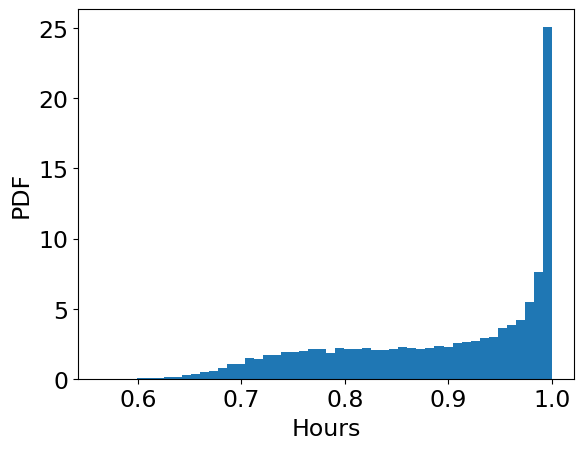

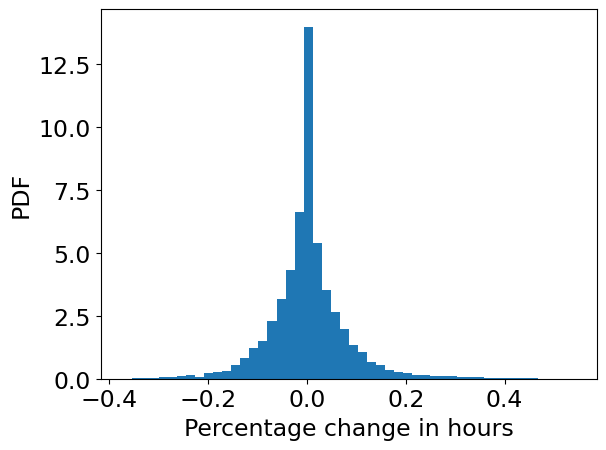

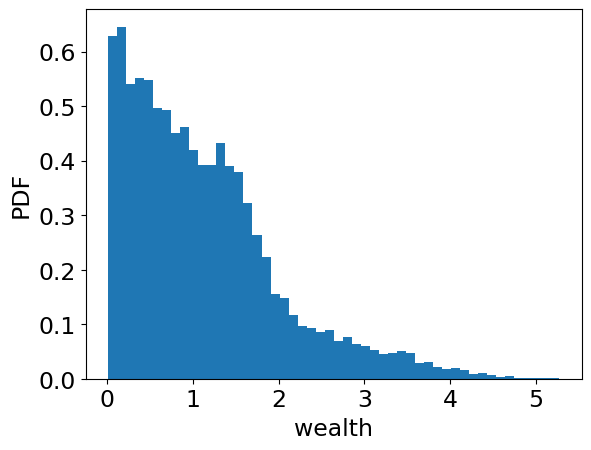

In [6]:
#kig på ændring i hours

gender = "w"

data2['rel_dif_hours_w']=data2['delta_hours_w']/data2['hours_w_l']

#kig på andel af par hvor en arbejder fuldtid


#stor en adnel er ved 1 

data2['hours_w_limit100'] = (data2['hours_w'] == 1)
data2['hours_w_limit100'] = data2['hours_w_limit100'].replace({True: 1, False: 0})
data2['hours_w_limit97'] = (data2['hours_w'] > 0.97)
data2['hours_w_limit97'] = data2['hours_w_limit97'].replace({True: 1, False: 0})

data2['hours_w_limit90'] = (data2['hours_w'] > 0.90)
data2['hours_w_limit90'] = data2['hours_w_limit90'].replace({True: 1, False: 0})

data2['hours_m_limit'] = (data2['hours_m'] > 0.97)
data2['hours_m_limit'] = data2['hours_m_limit'].replace({True: 1, False: 0})


print(data2[['hours_w_limit97','hours_w','hours_m_limit','barganing']])



summary = data2[['rel_dif_hours_w','delta_hours_w','hours_w_l', 'hours_w_limit100', 'hours_w_limit97', 'hours_w_limit90']].describe([.01,.1,.25,.5,.75,.9,.99])
print(summary)
#antag små ændringer er + - 10%

plt.hist(data2['hours_w'], bins = 50, density = True)
plt.xlabel('Hours')
plt.ylabel('PDF')
plt.savefig(f'output/hours_plot{model_name}_{gender}.png')
plt.show()

data3 = data2
data3=data3.drop(data3[(data3['hours_w_l']>0.9999) | (data3['hours_m_l']>0.9999) | (data3['hours_w']>0.9999) | (data3['hours_m']>0.9999)].index)

plt.hist(data2['rel_dif_hours_w'], bins = 50, density = True)
plt.xlabel('Percentage change in hours')
plt.ylabel('PDF')

plt.savefig(f'output/change_in_hours_plot{model_name}_{gender}.png')
#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()



plt.hist(data2['wealth'], bins = 50, density = True)
plt.xlabel('wealth')
plt.ylabel('PDF')
plt.show()


C:\Users\czk481\AppData\Local\Temp\2\ipykernel_8900\2458348444.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data2['rel_dif_barg']=data2['delta_barganing']/data2['barganing_l']


       delta_barganing   barganing_l  rel_dif_barg
count     16058.000000  16058.000000  16058.000000
mean         -0.000035      0.500151      0.003144
std           0.025852      0.116303      0.060900
min          -0.342161      0.222758     -0.503256
1%           -0.092654      0.260663     -0.158143
10%           0.000000      0.351956      0.000000
25%           0.000000      0.397810      0.000000
50%           0.000000      0.498820      0.000000
75%           0.000000      0.604105      0.000000
90%           0.000000      0.648042      0.000000
99%           0.088961      0.732550      0.232518
max           0.374914      0.775287      1.408736


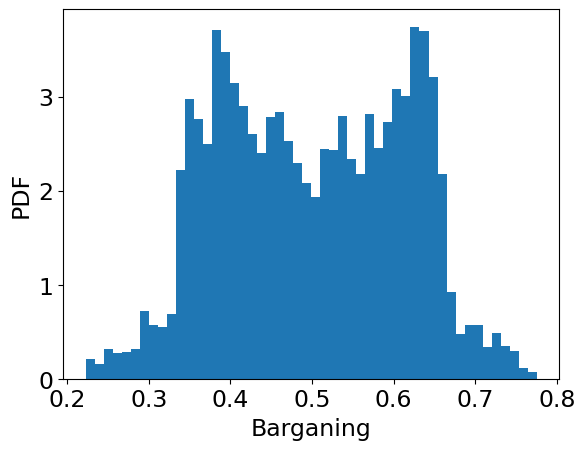

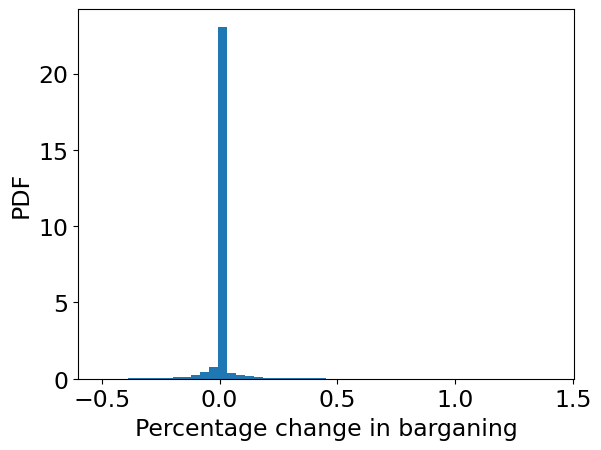

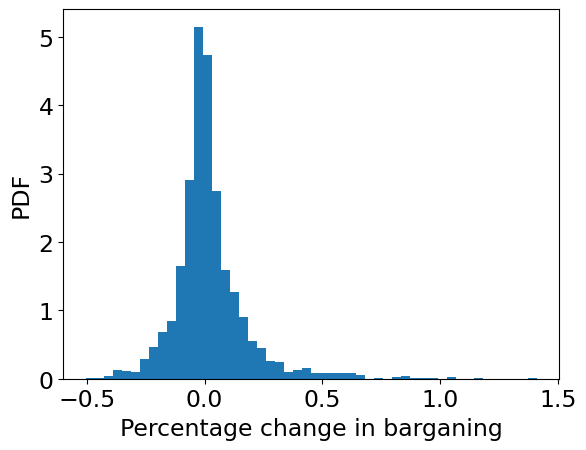

In [7]:
#bargaining
#kig på ændring i hours

gender = "w"

data2['rel_dif_barg']=data2['delta_barganing']/data2['barganing_l']

#kig på andel af par hvor en arbejder fuldtid


#stor en adnel er ved 1 



summary = data2[['delta_barganing','barganing_l','rel_dif_barg']].describe([.01,.1,.25,.5,.75,.9,.99])
print(summary)
#antag små ændringer er + - 10%

plt.hist(data2['barganing'], bins = 50, density = True)
plt.xlabel('Barganing')
plt.ylabel('PDF')
plt.savefig(f'output/barganing_plot{model_name}_{gender}.png')
plt.show()

data3 = data2
#data3=data3.drop(data3[data3['barganing']== 0.5].index)

plt.hist(data2['rel_dif_barg'], bins = 50, density = True)
#plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
plt.xlabel('Percentage change in barganing')
plt.ylabel('PDF')

plt.savefig(f'output/change_in_barg_plot{model_name}_{gender}.png')
#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()



data3 = data2
data3=data3.drop(data3[data3['rel_dif_barg']== 0.0].index)

plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
#plt.hist(data3['rel_dif_barg'], bins = 50, density = True)
plt.xlabel('Percentage change in barganing')
plt.ylabel('PDF')

#plt.hist(data3['rel_dif_hours_w'], bins = 50)
plt.show()

